In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [15]:
df = pd.read_excel('Data/house_price_dống-da.xlsx')
df.head(2)

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [6]:
df.describe()

,area,price,toilet,bedroom,floor,lat,long
count,994.000000,9.440000e+02,551.000000,635.000000,376.000000,1000.000000,1000.000000
mean,137.972082,2.202988e+04,3.646098,3.959055,4.755319,21.015726,105.824669
std,742.629174,1.195280e+05,2.170039,2.298311,1.664924,0.006579,0.009462
min,0.000000,4.500000e+00,1.000000,1.000000,1.000000,20.998499,105.795544
25%,40.000000,3.650000e+03,2.000000,3.000000,4.000000,21.011113,105.819943
50%,60.000000,7.000000e+03,4.000000,4.000000,5.000000,21.018030,105.827298
75%,120.000000,1.550000e+04,4.000000,5.000000,5.000000,21.020169,105.829949
max,20000.000000,3.300000e+06,17.000000,22.000000,11.000000,21.036845,105.841429


## 1. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [9]:
df[df.isna().any(axis = 1)]

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
5,"Bán gấp mặt phố Chùa Bộc, Đống Đa, thang máy, ...","Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",41.0,13500.0,2021-04-04,Sổ đỏ,NaN,NaN,5.0,3.0,6.0,Bán nhà mặt phố\n,Phố Chùa Bộc,Phường Quang Trung,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230
6,Bán nhà mặt phố Hoàng Cầu - Mai Anh Tuấn. Đối ...,"Phố Hoàng Cầu, Phường Láng Hạ, Đống Đa, Hà Nội",50.0,13000.0,2021-04-06,Sổ đỏ,NaN,NaN,5.0,4.0,5.0,Bán nhà mặt phố\n,Phố Hoàng Cầu,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.014612,105.819296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Bán nhà mặt phố Yên Lãng, Đống Đa, 65m2, 5T, 1...","Đường Yên Lãng, Phường Láng Hạ, Đống Đa, Hà...",65.0,17500.0,2021-05-09,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Đường Yên Lãng,Phường Láng Hạ,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
996,"Bán nhà 5 tầng đep MP Yên Lãng giá rẻ, DT 60m2...","Đường Yên Lãng, Phường Trung Liệt, Đống Đa, ...",60.0,17500.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.011495,105.816666
997,MẶT PHỐ XÃ ĐÀN - KINH DOANH ĐỈNH CAO - 6 TẦNG ...,"Phố Xã Đàn, Phường Ô Chợ Dừa, Đống Đa, Hà Nội",45.0,24800.0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Bán nhà mặt phố\n,Đường Ô Chợ Dừa,Phường Ô Chợ Dừa,Quận Đống Đa,Thành phố Hà Nội,21.016106,105.832157
998,"Bán nhà mặt hồ Văn Chương, Đống Đa 33m2, 6 tần...","Hồ Văn Chương, Phường Văn Chương, Quận Đống Đa...",178.0,8100.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,3.0,NaN,Bán nhà riêng,Đường Hồ Văn Chương,Phường Văn Chương,Quận Đống Đa,Thành phố Hà Nội,21.021345,105.833122


## 2. Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [16]:
df = df.dropna(subset = ['price'], axis = 0)
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


## 3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó.

In [17]:
# land_certificate
df['land_certificate'].fillna('Unknown',inplace=True)
df['land_certificate'].unique()

array(['Sổ đỏ', 'Unknown'], dtype=object)

In [42]:
df['house_direction'].mode()[0]

'Đông-Nam'

In [50]:
def fill_mode(col):
    return col.fillna(col.mode()[0])
# house_direction, balcony_direction, toilet, floor
df[['house_direction', 'balcony_direction',
    'toilet', 'floor']] = df[['house_direction', 'balcony_direction', 
                              'toilet', 'floor']].apply(fill_mode,axis = 0)

In [52]:
# check
df[['house_direction', 'balcony_direction','toilet', 'floor']]

,house_direction,balcony_direction,toilet,floor
0,Đông-Nam,Đông-Nam,4.0,6.0
1,Đông-Nam,Đông-Nam,4.0,6.0
2,Nam,Nam,3.0,4.0
3,Đông,Đông-Nam,6.0,6.0
4,Đông-Nam,Đông-Nam,4.0,5.0
...,...,...,...,...
995,Đông-Nam,Đông-Nam,4.0,5.0
996,Đông-Nam,Đông-Nam,4.0,5.0
997,Đông-Nam,Đông-Nam,4.0,5.0
998,Đông-Nam,Đông-Nam,4.0,5.0


## 4. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [104]:
df_tmp = df[~df['type_of_land'].isin(['Bán nhà mặt phố\n ','Bán nhà mặt phố'])]
df_tmp['type_of_land'].unique()

array(['Bán nhà riêng\n ', 'Tập thể, cư xá', 'Bán nhà riêng', 'Chung cư',
       'Bất động sản khác', 'Bất động sản khác\n ', 'Đất thổ cư'],
      dtype=object)

In [105]:
df_tmp['price/m2'] = df_tmp['price']/ df_tmp['area']
df_tmp.head(2)

/tmp/ipykernel_5400/1561719520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['price/m2'] = df_tmp['price']/ df_tmp['area']


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,price/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,Đông-Nam,Đông-Nam,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.000000
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,73.684211


## 5. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

In [106]:
df_tmp.describe()

,area,price,toilet,bedroom,floor,lat,long,price/m2
count,714.000000,715.000000,715.000000,521.000000,715.000000,715.000000,715.000000,714.000000
mean,93.303151,7468.904336,3.616783,3.673704,4.896503,21.015646,105.823942,inf
std,85.309184,8339.914435,1.656410,2.010802,0.838784,0.006899,0.009989,NaN
min,0.000000,30.000000,1.000000,1.000000,1.000000,20.998499,105.795544,13.600000
25%,40.000000,3150.000000,3.000000,2.000000,5.000000,21.010448,105.816666,29.166667
50%,55.500000,5000.000000,4.000000,3.000000,5.000000,21.017799,105.825845,93.993506
75%,120.000000,8800.000000,4.000000,4.000000,5.000000,21.020312,105.829949,158.266129
max,525.000000,120000.000000,16.000000,14.000000,11.000000,21.036845,105.841429,inf


<AxesSubplot:>

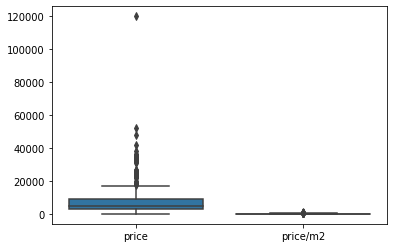

In [107]:
sns.boxplot(data = df_tmp[['price','price/m2']])

In [109]:
price_Q1 = df_tmp['price'].quantile(q= 0.25)
price_Q3 = df_tmp['price'].quantile(q= 0.75)
price_IQR = price_Q3 - price_Q1

price_m2_Q1 = df_tmp['price/m2'].quantile(q= 0.25)
price_m2_Q3 = df_tmp['price/m2'].quantile(q= 0.75)
price_m2_IQR = price_m2_Q3 - price_m2_Q1

df_tmp = df_tmp[~((df_tmp['price'] < price_Q1 - 1.5*price_IQR) | 
    (df_tmp['price'] > price_Q3 + 1.5*price_IQR) |
    (df_tmp['price/m2'] < price_m2_Q1 - 1.5*price_m2_IQR)| 
    (df_tmp['price/m2'] > price_m2_Q3 + 1.5*price_m2_IQR))] 

In [110]:
df_tmp.describe()

,area,price,toilet,bedroom,floor,lat,long,price/m2
count,643.000000,644.000000,644.000000,487.000000,644.000000,644.000000,644.000000,643.000000
mean,92.113142,5703.333230,3.482919,3.474333,4.844720,21.015581,105.824340,90.650339
std,82.705765,3731.644039,1.521649,1.768162,0.699335,0.007086,0.009996,68.846475
min,10.000000,450.000000,1.000000,1.000000,1.000000,20.998499,105.795544,13.600000
25%,40.000000,3100.000000,3.000000,2.000000,5.000000,21.009971,105.818061,28.000000
50%,55.000000,4700.000000,4.000000,3.000000,5.000000,21.017006,105.827262,82.812500
75%,120.000000,7820.000000,4.000000,4.000000,5.000000,21.020312,105.831187,128.571429
max,525.000000,17000.000000,14.000000,13.000000,8.000000,21.036845,105.841429,320.000000


<AxesSubplot:>

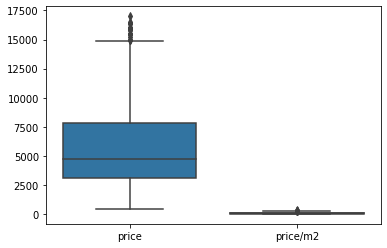

In [111]:
sns.boxplot(data = df_tmp[['price','price/m2']])

## 6. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa


In [116]:
# lọc ra những dòng số
unscale_df = df_tmp.select_dtypes(['float64', 'int64'])
unscale_df

,area,price,toilet,bedroom,floor,lat,long,price/m2
0,50.0,14700.0,4.0,6.0,6.0,21.015698,105.824583,294.000000
2,57.0,4200.0,3.0,8.0,4.0,21.025208,105.833111,73.684211
3,62.0,11000.0,6.0,5.0,6.0,21.025379,105.801011,177.419355
7,26.0,2900.0,4.0,3.0,4.0,21.014325,105.834918,111.538462
8,40.0,3950.0,4.0,NaN,5.0,21.009862,105.838083,98.750000
...,...,...,...,...,...,...,...,...
989,38.0,3900.0,4.0,3.0,5.0,21.006694,105.835635,102.631579
990,168.0,3700.0,5.0,4.0,5.0,21.008365,105.818022,22.023810
991,180.0,4100.0,5.0,4.0,5.0,21.008365,105.818022,22.777778
994,25.0,2850.0,3.0,2.0,4.0,21.026821,105.825845,114.000000


<AxesSubplot:>

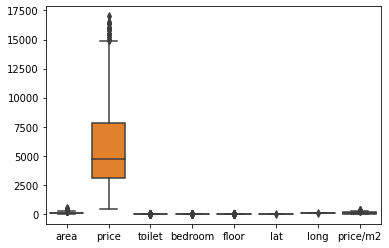

In [120]:
sns.boxplot(data = unscale_df)

### 6.1 MinMaxScaler

In [119]:
scaler = MinMaxScaler()
scale_df = scaler.fit_transform(unscale_df)
scale_df = pd.DataFrame(scale_df, columns = unscale_df.columns)
scale_df

,area,price,toilet,bedroom,floor,lat,long,price/m2
0,0.077670,0.861027,0.230769,0.416667,0.714286,0.448531,0.632872,0.915144
1,0.091262,0.226586,0.153846,0.583333,0.428571,0.696526,0.818720,0.196097
2,0.100971,0.637462,0.384615,0.333333,0.714286,0.700993,0.119158,0.534658
3,0.031068,0.148036,0.230769,0.166667,0.428571,0.412715,0.858103,0.319642
4,0.058252,0.211480,0.230769,NaN,0.571429,0.296339,0.927075,0.277905
...,...,...,...,...,...,...,...,...
639,0.054369,0.208459,0.230769,0.166667,0.571429,0.213710,0.873722,0.290573
640,0.306796,0.196375,0.307692,0.250000,0.571429,0.257284,0.489876,0.027493
641,0.330097,0.220544,0.307692,0.250000,0.571429,0.257284,0.489876,0.029954
642,0.029126,0.145015,0.153846,0.083333,0.428571,0.738588,0.660364,0.327676


<AxesSubplot:>

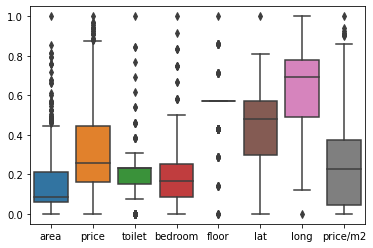

In [121]:
sns.boxplot(data = scale_df)

### 6.2 RobustScaler

In [122]:
scaler = RobustScaler()
scaler_df = scaler.fit_transform(unscale_df)
scaler_df = pd.DataFrame(scaler_df,columns=unscale_df.columns)
scaler_df

,area,price,toilet,bedroom,floor,lat,long,price/m2
0,-0.0625,2.118644,0.0,1.5,1.0,-0.126476,-0.204095,2.099876
1,0.0250,-0.105932,-1.0,2.5,-1.0,0.793126,0.445621,-0.090764
2,0.0875,1.334746,2.0,1.0,1.0,0.809691,-2.000011,0.940693
3,-0.3625,-0.381356,0.0,0.0,-1.0,-0.259286,0.583302,0.285627
4,-0.1875,-0.158898,0.0,NaN,0.0,-0.690826,0.824425,0.158469
...,...,...,...,...,...,...,...,...
639,-0.2125,-0.169492,0.0,0.0,0.0,-0.997225,0.637907,0.197065
640,1.4125,-0.211864,1.0,0.5,0.0,-0.835646,-0.704000,-0.604433
641,1.5625,-0.127119,1.0,0.5,0.0,-0.835646,-0.704000,-0.596936
642,-0.3750,-0.391949,-1.0,-0.5,-1.0,0.949096,-0.107982,0.310103


<AxesSubplot:>

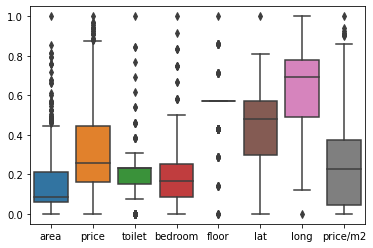

In [123]:
sns.boxplot(data = scale_df)